![Icesi](image.png)

# Nivelatorio II: Estadística para la Ciencia de Datos

## Tutorial en Pyhton - Sesión 1

Antes de entrar a trabajar con los datos, recordemos que el primer paso de todo proyecto de analítica es el *business understanding*. Necesitamos entender el contexto del problema y el objetivo del proyecto. En este caso, se trata de una base de datos que contiene mediciones quinquenales de la expectativa de vida, la población y el PIB per cápita) para todos los países, desde 1952 hasta 2007. Es decir, estamos en un contexto de medición de indicadores sociales para rastrear el progreso social de los países. Por tanto, el objetivo del proyecto de analítica es analizar el progreso social de los países desde 1952 hasta 2007.

Primero vamos a cargar algunas librerias relevantes que vamos a utilizar en esta sesión.

In [2]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas

El paso siguiente es cargar la base de datos y entender su estructura.

In [3]:
base=pd.read_excel("Gapminder.xlsx")
base.head(20)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Podemos también revisar los tipos de columna.

In [4]:
base.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

## Preparación de datos
Vamos a repasar algunos procedimientos para preparar datos. Vamos a ver 5: eliminación de columnas, filtros, reordenar filas, renombrar columnas y creación de columnas nuevas. 

Supongamos que deseamos eliminar columnas, por ejemplo si quisieramos solo enfocarnos en PIB per cápita y no en los otros dos indicadores:

In [5]:
base_pib=base[['country','continent','year','gdpPercap']]
base_pib

,country,continent,year,gdpPercap
0,Afghanistan,Asia,1952,779.445314
1,Afghanistan,Asia,1957,820.853030
2,Afghanistan,Asia,1962,853.100710
3,Afghanistan,Asia,1967,836.197138
4,Afghanistan,Asia,1972,739.981106
...,...,...,...,...
1699,Zimbabwe,Africa,1987,706.157306
1700,Zimbabwe,Africa,1992,693.420786
1701,Zimbabwe,Africa,1997,792.449960
1702,Zimbabwe,Africa,2002,672.038623


La otra opción para cumplir con esta tarea es usar la función *drop*:

In [6]:
base_pib=base.drop(columns=['lifeExp','pop'])
base_pib

,country,continent,year,gdpPercap
0,Afghanistan,Asia,1952,779.445314
1,Afghanistan,Asia,1957,820.853030
2,Afghanistan,Asia,1962,853.100710
3,Afghanistan,Asia,1967,836.197138
4,Afghanistan,Asia,1972,739.981106
...,...,...,...,...
1699,Zimbabwe,Africa,1987,706.157306
1700,Zimbabwe,Africa,1992,693.420786
1701,Zimbabwe,Africa,1997,792.449960
1702,Zimbabwe,Africa,2002,672.038623


También se podrían utilizar los índices de las columnas:

In [7]:
base_pib=base.iloc[:,[0,1,2,5]]
base_pib

,country,continent,year,gdpPercap
0,Afghanistan,Asia,1952,779.445314
1,Afghanistan,Asia,1957,820.853030
2,Afghanistan,Asia,1962,853.100710
3,Afghanistan,Asia,1967,836.197138
4,Afghanistan,Asia,1972,739.981106
...,...,...,...,...
1699,Zimbabwe,Africa,1987,706.157306
1700,Zimbabwe,Africa,1992,693.420786
1701,Zimbabwe,Africa,1997,792.449960
1702,Zimbabwe,Africa,2002,672.038623


Supongamos ahora que deseamos filtrar la base de datos por alguna condición, por ejemplo si quisieramos solo enfocarnos en los países asiáticos:

In [8]:
base_asia=base[base['continent']=='Asia']
base_asia

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


Noten que los índices de las filas siguen siendo los de la base sin filtros, por lo que es útil siempre que se usen filtros reiniciar los índices:

In [9]:
base_asia=base[base['continent']=='Asia'].reset_index(drop=True)
base_asia

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
391,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
392,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
393,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
394,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


También, podemos filtrar por una condición que incluya una desigualdad, por ejemplo, registros con poblaciones mayores a 5 millones:

In [10]:
base_pob5=base[base['pop']>5000000].reset_index(drop=True)
base_pob5

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
994,Zimbabwe,Africa,1987,62.351,9216418,706.157306
995,Zimbabwe,Africa,1992,60.377,10704340,693.420786
996,Zimbabwe,Africa,1997,46.809,11404948,792.449960
997,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Igualmente, también se podría filtrar usando más de una condición. Por ejemplo, registros de países asiáticos con población mayor a 5 millones:

In [11]:
base_asia5=base[(base['continent']=='Asia') & (base['pop']>5000000)].reset_index(drop=True)
base_asia5

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
274,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
275,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
276,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
277,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


Finalmente, quisiera mencionar un caso en el que queremos filtrar usando una condición de tipo *is in*. Por ejemplo, si quisieramos filtrar por los países que están contenidos en una lista (Argentina, Colombia y Chile):

In [12]:
lista_paises=['Argentina','Colombia','Chile']
base_paises=base[base['country'].isin(lista_paises)].reset_index(drop=True)
base_paises

,country,continent,year,lifeExp,pop,gdpPercap
0,Argentina,Americas,1952,62.485,17876956,5911.315053
1,Argentina,Americas,1957,64.399,19610538,6856.856212
2,Argentina,Americas,1962,65.142,21283783,7133.166023
3,Argentina,Americas,1967,65.634,22934225,8052.953021
4,Argentina,Americas,1972,67.065,24779799,9443.038526
5,Argentina,Americas,1977,68.481,26983828,10079.026740
6,Argentina,Americas,1982,69.942,29341374,8997.897412
7,Argentina,Americas,1987,70.774,31620918,9139.671389
8,Argentina,Americas,1992,71.868,33958947,9308.418710
9,Argentina,Americas,1997,73.275,36203463,10967.281950


**Ejercicio:** Obtenga una base de datos que contenga solo los registros del año 2007 y que excluya los países de Oceanía.

In [13]:
base_07_sin_oc = base[(base['continent']!='Oceania') & (base['year']==2007)]
base_07_sin_oc

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


Veamos ahora como reordenar filas. Supongamos que queremos ordernar por año y población, ambos de menor a mayor:

In [14]:
base_order=base.sort_values(by=['year','pop'])
base_order

,country,continent,year,lifeExp,pop,gdpPercap
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.583586
420,Djibouti,Africa,1952,34.812,63149,2669.529475
84,Bahrain,Asia,1952,50.939,120447,9867.084765
684,Iceland,Europe,1952,72.490,147962,7267.688428
312,Comoros,Africa,1952,40.715,153936,1102.990936
...,...,...,...,...,...,...
179,Brazil,Americas,2007,72.390,190010647,9065.800825
719,Indonesia,Asia,2007,70.650,223547000,3540.651564
1619,United States,Americas,2007,78.242,301139947,42951.653090
707,India,Asia,2007,64.698,1110396331,2452.210407


Y si quisieramos año de menor a mayor, pero población de mayor o menor, sería así:

In [15]:
base_order=base.sort_values(by=['year','pop'],ascending=[True,False])
base_order

,country,continent,year,lifeExp,pop,gdpPercap
288,China,Asia,1952,44.000,556263527,400.448611
696,India,Asia,1952,37.373,372000000,546.565749
1608,United States,Americas,1952,68.440,157553000,13990.482080
792,Japan,Asia,1952,63.030,86459025,3216.956347
708,Indonesia,Asia,1952,37.468,82052000,749.681655
...,...,...,...,...,...,...
1019,Montenegro,Europe,2007,74.543,684736,9253.896111
491,Equatorial Guinea,Africa,2007,51.579,551201,12154.089750
431,Djibouti,Africa,2007,54.791,496374,2082.481567
695,Iceland,Europe,2007,81.757,301931,36180.789190


Veamos ahora como renombar las columnas.

In [16]:
base.rename(columns={
    'country':'País',
    'continent':'Continente',
    'year':'Año',
    'lifeExp':'Expectativa de vida',
    'pop':'Población',
    'gdpPercap':'PIB per capita'
}, inplace=True)
base

,País,Continente,Año,Expectativa de vida,Población,PIB per capita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Por último, veamos cómo crear columnas nuevas a partir de existentes. Por ejemplo, si quisieramos una nueva columna que tuviera el PIB total de cada país:

In [17]:
base['PIB']=base['PIB per capita'] * base['Población']
base

,País,Continente,Año,Expectativa de vida,Población,PIB per capita,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,9.678553e+09
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,6.508241e+09
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,7.422612e+09
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,9.037851e+09
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,8.015111e+09


Podríamos usar una condición si es el caso, para crear una columna nueva. Por ejemplo, si quisieramos una columna que identifique los países con expectativa de vida menor a 50 años:

In [18]:
base['Nivel bajo expectativa de vida']=np.where(base['Expectativa de vida']<60,'Bajo','Normal')
base

,País,Continente,Año,Expectativa de vida,Población,PIB per capita,PIB,Nivel bajo expectativa de vida
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,6.567086e+09,Bajo
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,7.585449e+09,Bajo
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,8.758856e+09,Bajo
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,9.648014e+09,Bajo
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,9.678553e+09,Bajo
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,6.508241e+09,Normal
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,7.422612e+09,Normal
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,9.037851e+09,Bajo
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,8.015111e+09,Bajo


**Ejercicio:** Cree una nueva columna que identifique a los países finalistas del Mundial Qatar 2022 (Argentina y France)

In [19]:
base['Finalista22'] = np.where(base['País'].isin(['Argentina','France']),'Sí','No')
base

,País,Continente,Año,Expectativa de vida,Población,PIB per capita,PIB,Nivel bajo expectativa de vida,Finalista22
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,6.567086e+09,Bajo,No
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,7.585449e+09,Bajo,No
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,8.758856e+09,Bajo,No
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,9.648014e+09,Bajo,No
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,9.678553e+09,Bajo,No
...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,6.508241e+09,Normal,No
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,7.422612e+09,Normal,No
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,9.037851e+09,Bajo,No
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,8.015111e+09,Bajo,No


In [20]:
base[base['País'].isin(['Argentina','France'])]

,País,Continente,Año,Expectativa de vida,Población,PIB per capita,PIB,Nivel bajo expectativa de vida,Finalista22
48,Argentina,Americas,1952,62.485,17876956,5911.315053,1.056763e+11,Normal,Sí
49,Argentina,Americas,1957,64.399,19610538,6856.856212,1.344666e+11,Normal,Sí
50,Argentina,Americas,1962,65.142,21283783,7133.166023,1.518208e+11,Normal,Sí
51,Argentina,Americas,1967,65.634,22934225,8052.953021,1.846882e+11,Normal,Sí
52,Argentina,Americas,1972,67.065,24779799,9443.038526,2.339966e+11,Normal,Sí
53,Argentina,Americas,1977,68.481,26983828,10079.026740,2.719707e+11,Normal,Sí
54,Argentina,Americas,1982,69.942,29341374,8997.897412,2.640107e+11,Normal,Sí
55,Argentina,Americas,1987,70.774,31620918,9139.671389,2.890048e+11,Normal,Sí
56,Argentina,Americas,1992,71.868,33958947,9308.418710,3.161041e+11,Normal,Sí
57,Argentina,Americas,1997,73.275,36203463,10967.281950,3.970536e+11,Normal,Sí


## Descripción de los datos

Una manera de proceder para cumplir el objetivo del proyecto de analítica sería analizar los datos de 1952 y los de 2007, y comparar el cambio. Para simplificar el ejemplo y enfocarlo al ejercicio de esta sesión vamos a analizar únicamente los datos del año 2007. Por favor obtenga una base de datos que solo contenga estos registros y llámela "base_final".

In [21]:
base_final = base[base['Año']==2007].reset_index(drop=True)
base_final

,País,Continente,Año,Expectativa de vida,Población,PIB per capita,PIB,Nivel bajo expectativa de vida,Finalista22
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,3.107929e+10,Bajo,No
1,Albania,Europe,2007,76.423,3600523,5937.029526,2.137641e+10,Normal,No
2,Algeria,Africa,2007,72.301,33333216,6223.367465,2.074449e+11,Normal,No
3,Angola,Africa,2007,42.731,12420476,4797.231267,5.958390e+10,Bajo,No
4,Argentina,Americas,2007,75.320,40301927,12779.379640,5.150336e+11,Normal,Sí
...,...,...,...,...,...,...,...,...,...
137,Vietnam,Asia,2007,74.249,85262356,2441.576404,2.081746e+11,Normal,No
138,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,1.215686e+10,Normal,No
139,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,5.065987e+10,Normal,No
140,Zambia,Africa,2007,42.384,11746035,1271.211593,1.493170e+10,Bajo,No


Ahora sí, vamos a proceder a analizar descriptivamente dos variables: una cualitativa y otra cuantitativa.

### Variable cualitativa
Tomemos como ejemplo la variable continente. Vimos en las diapositivas que existen dos formas de describir una variable cualitativa: de manera numérica y de manera gráfica.

De manera numérica sería construir la tabla de frecuencias. La función estandar es la siguiente:

In [22]:
base_final['Continente'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: Continente, dtype: int64

Otra función muy útil para realizar esta tareas es *crosstab*:

In [23]:
pd.crosstab(index=base_final["Continente"],columns="count")

col_0,count
Continente,
Africa,52
Americas,25
Asia,33
Europe,30
Oceania,2


Recordemos que la tabla de frecuencias incluye también la frecuencia relativa:

In [24]:
tabla_freq=(pd.crosstab(index=base_final["Continente"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,Continente,Freq. Abs.,Freq. Rel.
0,Africa,52,0.366197
1,Asia,33,0.232394
2,Europe,30,0.211268
3,Americas,25,0.176056
4,Oceania,2,0.014085


Lo que podemos decir entonces es que Africa es el continente que más países tiene, mientras que Oceanía es el que menos.

Ahora pasemos a describir de manera gráfica. Primero vamos a revisar la librería *matlibplot*:

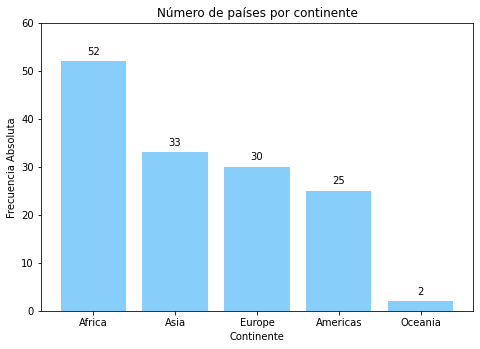

In [25]:
fig_cont_fa = plt.figure()    ## Crea una figura bajo el nombre "fig_cont_fa"
ax = fig_cont_fa.add_axes([0,0,1,1])     ## Crea los ejes de la gráfica donde (0,0) es la esquina inferor izquierda y 
                                          ## (1,1) la esquina superior derecha
ax.bar(tabla_freq['Continente'],tabla_freq['Freq. Abs.'],color='lightskyblue')  ## Crea el gráfico de barras con los datos entregados
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.0f', padding=5)  ## Crea los labels sobre las barras
ax.set(ylim=(0, 60))  ## Cambia los límites del eje Y (limite inferior a limite superior)
plt.title("Número de países por continente")  ## Título de la gráfica
plt.ylabel('Frecuencia Absoluta')   ## Título del eje Y 
plt.xlabel('Continente')           ## Título del eje X
plt.show()                       ## Muestra la figura

Para buscar colores para sus gráficas:
 - Paleta de colores de Pyhton la pueden encontrar aquí: https://www.webucator.com/article/python-color-constants-module/
 - https://www.w3schools.com/colors/colors_hexadecimal.asp (Códigos de color Hex)
 
También podríamos hacer una gráfica de frecuencia relativa, que en la mayoría de los casos es lo más recomendable:

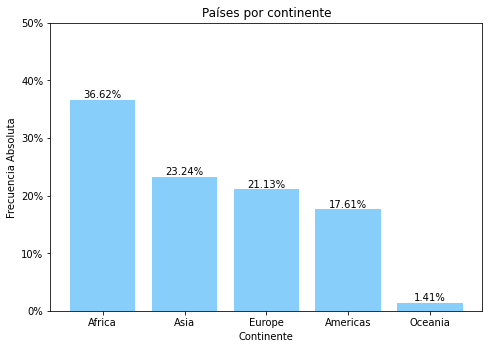

In [26]:
fig_cont_fr = plt.figure()    ## Crea una figura bajo el nombre "fig_cont_fr"
ax = fig_cont_fr.add_axes([0,0,1,1])     ## Crea los ejes de la gráfica donde (0,0) es la esquina inferor izquierda y 
                                          ## (1,1) la esquina superior derecha
ax.bar(tabla_freq['Continente'],tabla_freq['Freq. Rel.']*100,color='lightskyblue')  ## Crea el gráfico de barras con los datos entregados
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  ## Crea los labels sobre las barras
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))  ## Cambia la unidad de medida del eje Y a porcentaje
ax.set(ylim=(0, 50))  ## Cambia los límites del eje Y
plt.title("Países por continente")  ## Título de la gráfica
plt.ylabel('Frecuencia Absoluta')   ## Título del eje Y 
plt.xlabel('Continente')           ## Título del eje X
plt.show()  ## Muestra la figura

Ahora usemos la librería *seaborn* (¿Cuál es la diferencia?: https://datauntold.com/matplotlib-vs-seaborn/): 

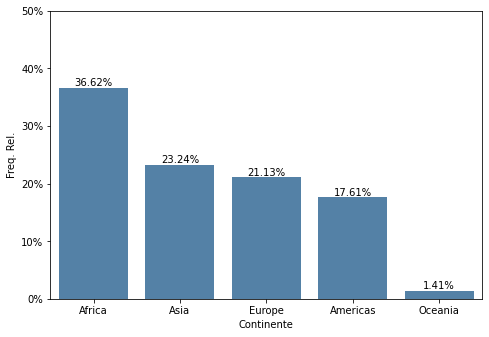

In [27]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=tabla_freq["Continente"],y=tabla_freq["Freq. Rel."]*100, color="steelblue") ## aquí es el cambio
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 50))
plt.show()  

Solo por revisarlo, construyamos un gráfico de torta:

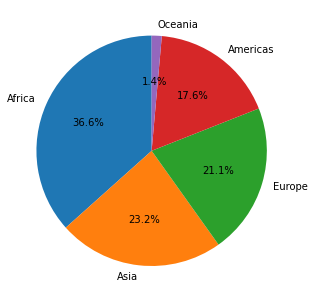

In [28]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["Continente"],autopct='%1.1f%%',startangle=90)
plt.show()

### Variable cuantitativa
Para nuestro ejemplo de describir una variable cuantitativa usemos la expectativa de vida. De manera numérica sería calcular las medidas de tendencial central, de dispersión y de posición:

In [29]:
base_final['Expectativa de vida'].describe()

count    142.000000
mean      67.007423
std       12.073021
min       39.613000
25%       57.160250
50%       71.935500
75%       76.413250
max       82.603000
Name: Expectativa de vida, dtype: float64

En modo dataframe:

In [30]:
tabla_descriptivas=pd.DataFrame(base_final[['Expectativa de vida','Población']].describe())
tabla_descriptivas

,Expectativa de vida,Población
count,142.000000,1.420000e+02
mean,67.007423,4.402122e+07
std,12.073021,1.476214e+08
min,39.613000,1.995790e+05
25%,57.160250,4.508034e+06
50%,71.935500,1.051753e+07
75%,76.413250,3.121004e+07
max,82.603000,1.318683e+09


Lo único que está faltando de las medidas que vimos es el coeficiente de variación, el de asimetría y el de curtosis. Podemos crear una función que lo agregue.

In [31]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [32]:
fun_tabla_descriptivas(base_final['Expectativa de vida'])

,Expectativa de vida
count,142.000000
mean,67.007423
std,12.073021
min,39.613000
25%,57.160250
50%,71.935500
75%,76.413250
max,82.603000
coef. variation,0.180174
skew,-0.681480


De esta manera, podríamos concluir que la distribución parece que es asimétrica negativa (es decir, con una cola larga hacia la izquierda) y es achatada. El centro de la distribución es aprox. 72 años y el 50% de los datos está agrupado entre 57 y 76 años.

De manera gráfica usamos un boxplot o un histograma. Revisemos primero el boxplot:

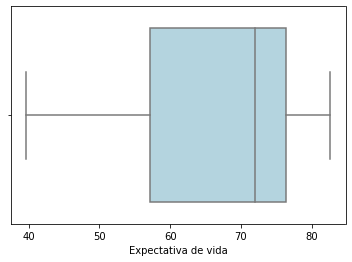

In [33]:
fig_boxplot = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.boxplot(x=base_final['Expectativa de vida'],color="lightblue")
plt.show()  

El boxplot tiene una variante muy interesante que es mostrar la distribución de datos sobre el boxplot:

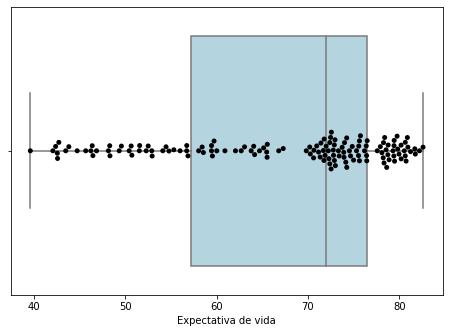

In [34]:
fig_box2 = plt.figure() 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=base_final['Expectativa de vida'],color="lightblue")
ax = sns.swarmplot(x=base_final['Expectativa de vida'],color='black')
plt.show()  

O también, podríamos mostrar el violin plot:

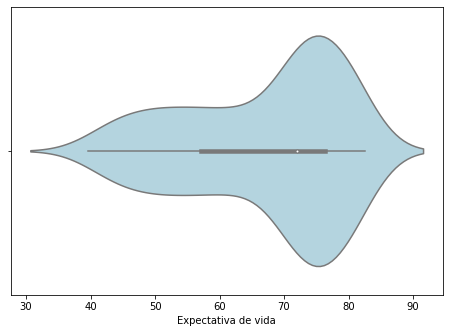

In [35]:
fig_violin = plt.figure() 
ax = fig_violin.add_axes([0,0,1,1])
ax=sns.violinplot(x=base_final['Expectativa de vida'],color="lightblue")
plt.show() 

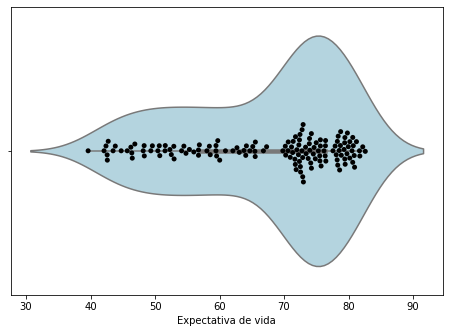

In [36]:
fig_violin = plt.figure() 
ax = fig_violin.add_axes([0,0,1,1])
ax=sns.violinplot(x=base_final['Expectativa de vida'],color="lightblue")
ax = sns.swarmplot(x=base_final['Expectativa de vida'],color='black')
plt.show() 

Finalmente, observemos el histograma:

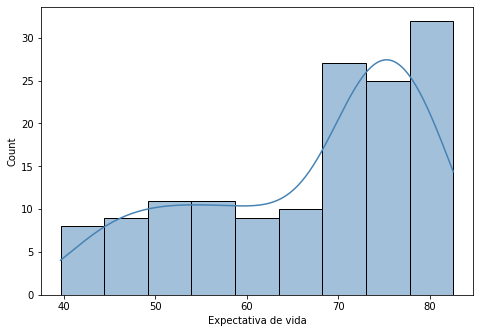

In [37]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue")
plt.show() 

La clave de un histograma es cómo calcular el número de bins o el ancho de éstos. Observemos por ejemplo 15 bins:

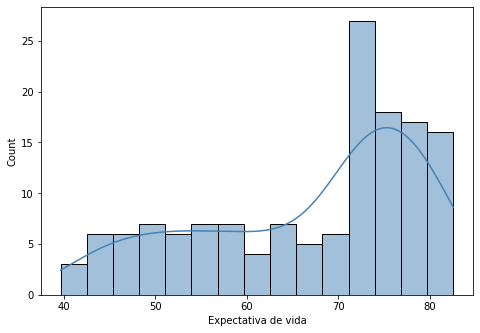

In [38]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue", bins=15)
plt.show() 

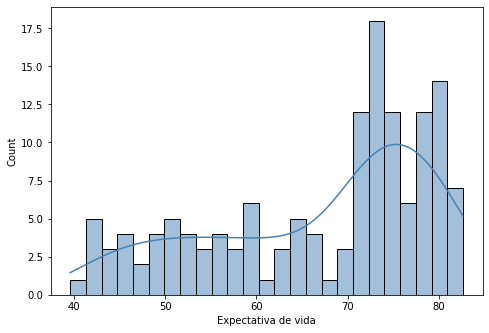

In [39]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue", bins=25) # o 25
plt.show() 

También se puede modificar el número de bins al escoger el ancho de éstos:

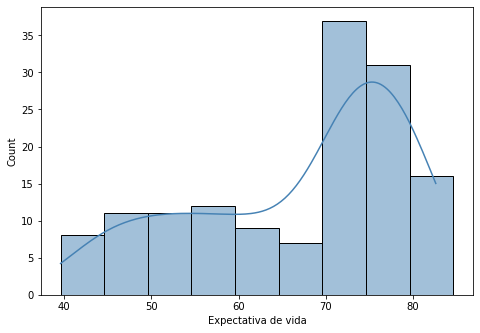

In [40]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue", binwidth=5)
plt.show() 

¿Cómo escoger el número de bins? No existe una respuesta correcta. Una regla bien conocida en los cursos de estadística es la de Sturge: (1+3.322*LN(n)):

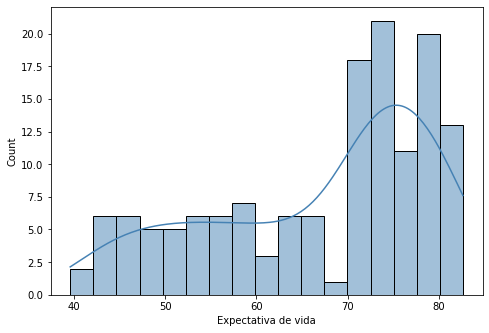

In [41]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue", 
                bins=round(1+3.322*np.log(len(base_final['Expectativa de vida']))))
plt.show() 

Otra es la regla de Rice: (2*(n)^(1/3)):

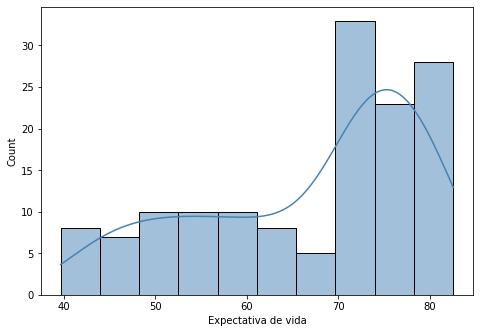

In [42]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base_final['Expectativa de vida'],kde=True,color="steelblue", 
                bins=round(2*(len(base_final['Expectativa de vida']))**(1/3)))
plt.show() 

Pregunta del millón: ¿por qué creen que existe esta distribución asimétrica donde parece que hay más de un centro?

In [46]:
tabla_cont=base_final.groupby(by=["Continente"])["Expectativa de vida"].describe().sort_values(by='50%', ascending=False)
tabla_cont

,count,mean,std,min,25%,50%,75%,max
Continente,,,,,,,,
Oceania,2.0,80.719500,0.729027,80.204,80.46175,80.7195,80.97725,81.235
Europe,30.0,77.648600,2.979813,71.777,75.02975,78.6085,79.81225,81.757
Americas,25.0,73.608120,4.440948,60.916,71.75200,72.8990,76.38400,80.653
Asia,33.0,70.728485,7.963724,43.828,65.48300,72.3960,75.63500,82.603
Africa,52.0,54.806038,9.630781,39.613,47.83400,52.9265,59.44425,76.442


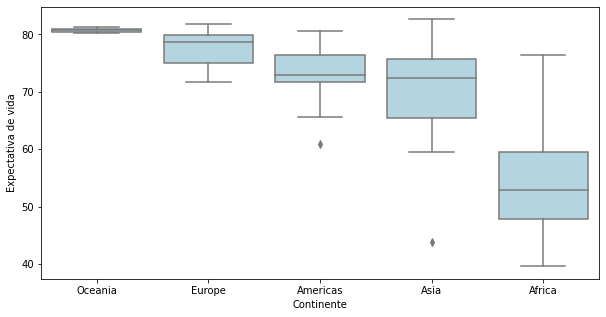

In [47]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.boxplot(x=base_final['Continente'], y=base_final['Expectativa de vida'],color="lightblue", 
               order=tabla_cont.sort_values(by='50%', ascending=False).index)
plt.show()  

---

## Actividad para la casa

Ahora filtre los datos para el año 1952 y responda lo siguiente:

 - ¿Cómo se distribuye la expectativa de vida de los países para el año 1952?
 - ¿Cambió la expectativa de vida de los países entre 1952 y 2007? Para esta pregunta abordarlo desde un punto de vista gráfico o comparando las medidas de tendencia central, dispersión y posición. Lo ideal es que muestra UNA SOLA tabla o gráfica donde se pueda comparar 1952 vs 2007 (sé que no hicimos algo similar en este tutorial, pero es importante que como cientificos de datos desarrollen la capacidad de autoaprendizaje buscando en Google, Blogs, Youtube, ChatGPTNO, etc.) NO se requiere ninguna prueba estadística, pues aún no hemos llegado a ellas.